# INTRODUCTION
## Purpose:
* The Titanic ship wreck is one of the most castatrophic event in the history of humankind. Out of 2,240 passengers, only 706 people survived. The purpose of this project is to build a machine learning model that predicts the survival state of Titanic's passengers based on given dataset from [this Kaggle competition](https://www.kaggle.com/c/titanic/overview).  

The dataset contains information of 891 people boarding on Titanic. According to the competition's description, some people were more likely to survive than others. For instance, women, children, and the upper-class were priotized. Hence, I will build a model to predict who would survive based on the follwing attributes:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


# PHASE 1: EDA & Data Cleaning
## Summary:
* Detected features that **theirselves** do not impact the survival rate (Cabin and Embarked).
* Dropped unnecessary columns (Name, PassengerId, Ticket, Cabin, Embarked).
* Created a new feature to indicate whether a person has a cabin (have_cabin).
* Filled N/A in Age with the average because it was missing at random.
* Transform values in Sex to 1 and 0.

Let's start by importing the neccessary libraries and data

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [273]:
df = pd.read_csv(r'./data/train.csv')
test_df = pd.read_csv(r'./data/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop unnecessary features that would not influence survival rate like Name, PId, and Ticket.

In [274]:
columns = ['PassengerId', 'Name', 'Ticket']
df.drop(columns, axis = 1, inplace=True)

In [275]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [276]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Looking at the tables, we can clearly see that Age and Cabin are missing many values (Embarked too but there are only 2 missing values). However, it is unsure that these feature are missing at random or not. In the next part, I will deal with missing data as well as exploring both numerical and categorical data.

### Exploring numerical data
#### Dealing with N/A values

In [278]:
age = df.groupby(df['Age'].isnull())
age.mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


Clearly there is some division between missing Age and not. People with missing age tends to have lower Pclass, more sibblings, significantly less parents/children, and paid less. However, it is simply not enough to conclude that the Age was not missing at random. Let's treat this feature by filling missing data with the average value.

In [279]:
df['Age'].fillna(np.mean(df['Age']), inplace=True)


Let's look at the impact of numerical attributes on the survival rate

In [280]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


#### Plotting
The average values may give us a quick look at the data, but plotting the attribute by survival state will give us deeper insight on how a feature impact the survival rate

##### Plotting continous variables

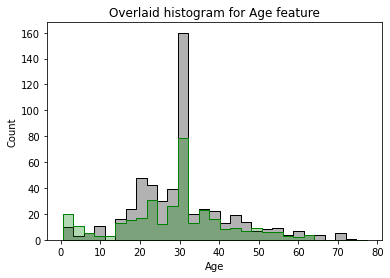

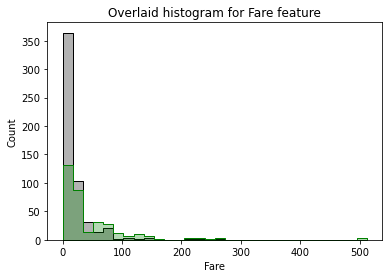

In [281]:
for col in ['Age', 'Fare']:
    #Let's plot 2 histograms for each feature
    dead = df[df['Survived'] == 0][col]
    survived = df[df['Survived'] == 1][col]
    #Calculate the range of x-axis
    xmin = min(min(dead), min(survived))
    xmax = max(max(dead), max(survived))
    width = (xmax-xmin) / 30
    #Plot
    sns.histplot(dead, color = 'black', bins = np.arange(xmin, xmax, width), kde= False, element = 'step', alpha = 0.3)
    sns.histplot(survived, color = 'green', bins = np.arange(xmin, xmax, width), kde= False, element = 'step', alpha = 0.3)
    plt.title('Overlaid histogram for {} feature'.format(col))
    plt.show()

From the Age plot, we can see that the age of people who did not survived highly concentrated in the 30s bin, which matchs with the average values, but the overall shapes are relatively similar between people who survied and people who did not, except for the ends.

Although we saw a drastic different between the average paid values, $48 and $22, the Fare plot indicates that outside of the first bar, the overall shapes are actually similar between people who survived and people who did not. 

##### Plotting discrete features

<Figure size 432x288 with 0 Axes>

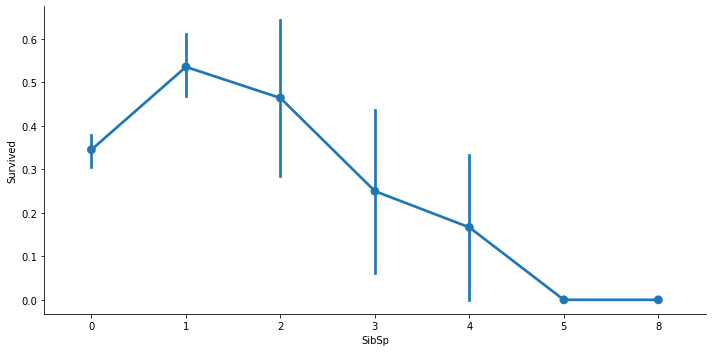

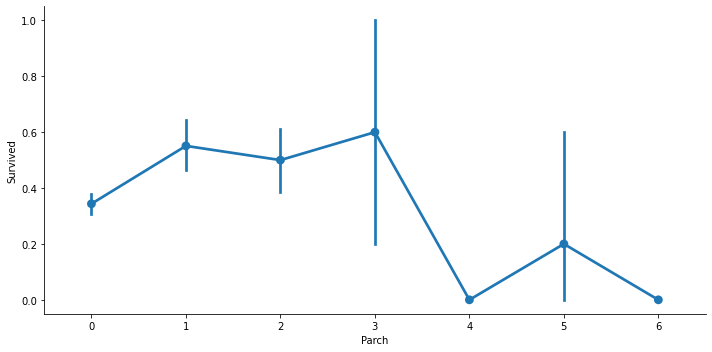

In [282]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x = col, y='Survived', data= df, kind='point', aspect= 2)

These plots indicates that people who have more relatives are less likely to survive. 

On top of that, since Parch and SibSp both refers to the number of relatives, and both have similar trend, it is wise to combine them to reduce the complexity of the dataset.

In [283]:
df['num_relatives'] = df['SibSp'] + df['Parch']
#Drop unnecessary features
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,num_relatives
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


We're done with numerical data here. Let's move on with categorical data.

### Exploring categorical values

#### Dealing with N/A values

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Cabin          204 non-null    object 
 6   Embarked       889 non-null    object 
 7   num_relatives  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Let's deal with missing values in Cabin feature. First, let's see if it is missng at random or not.

In [285]:
cabin = df.groupby(df['Cabin'].isnull())
cabin.mean()

,Survived,Pclass,Age,Fare,num_relatives
Cabin,,,,,
False,0.666667,1.196078,35.258349,76.141504,0.877451
True,0.299854,2.639010,28.048341,19.157325,0.912664


This time, there are significant differences between people missing value for Cabin and people who don't. For instace, people who do not have a cabin tends to have significantly lower survival rate, lower Pclass, and paid much less. My suggestion is these people **do not** have a cabin, not missing data for it. Additionally, it would be hard to determine whether a cabin value has impact on the survival rate (It's more about the location of the cabin but we do not have that data). Thus, I suggest there should be a feature ('have_cabin') to indicate whether a person has a cabin or not.

In [286]:
df['have_cabin'] = np.where(df['Cabin'].isnull(), 0, 1)
df.drop('Cabin', axis=1, inplace=True)

In [287]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,num_relatives,have_cabin
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0


### Plotting
#### Plot categorical features

<Figure size 432x288 with 0 Axes>

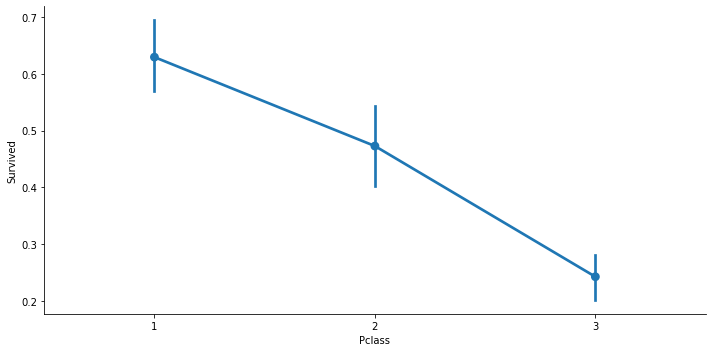

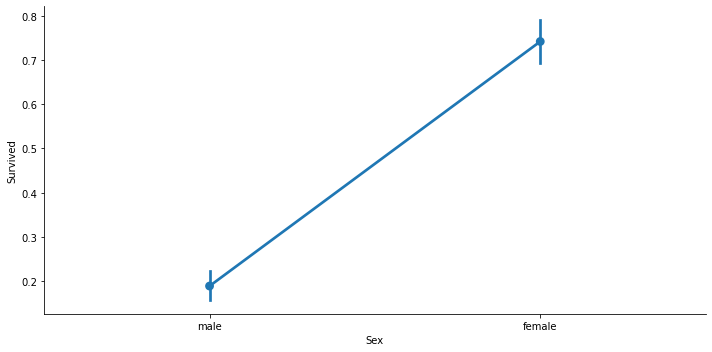

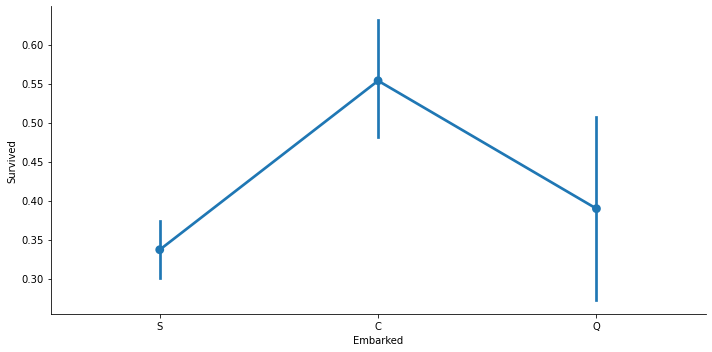

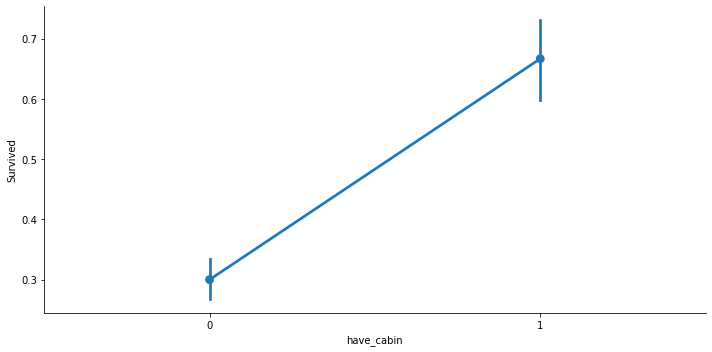

In [288]:
for i, col in enumerate(['Pclass','Sex','Embarked','have_cabin']):
    plt.figure(i)
    sns.catplot(x=col, y= 'Survived', data=df, kind='point', aspect = 2)

These plots indicate 4 things:
1. People who have higher Pclass (closer to 1) are more likely to survive.
2. Female is more likely to survive than male (Probably because female, children, and elders are priotized).
3. People who embarked from Southampton are less likely to survive than others (with small error).
4. People who have a cabin are more likely to survive than people who don't.

I highly doubt that embarked places would influence the survival rates, so I will dig more into this feature. There is a chance that this feature is correlated with other features, and those would be the real rationale than the feature itself.

In [289]:
# Let's find the correlation between Embarked and Sex
df.pivot_table('Survived', index='Sex', columns = 'Embarked', aggfunc= 'count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


The pivot table shows that while the gender ratio in Cherbourg and Queenstown are relatively balanced, people embarked from Southampton are more likely to be men. Given that male is less likely to survive than female, this should explains Southampton's low survival rate. 

In [290]:
df.pivot_table('Survived', index='have_cabin', columns = 'Embarked', aggfunc= 'count')

Embarked,C,Q,S
have_cabin,,,
0,99,73,515
1,69,4,129


Again, the pivot table shows that people from Q and S are less likely to have a cabin. Since we know having a cabin would influence wether a person lives or not, this should explains Q and S' low survial rates.

In conclusion, the *Embarked* feature is not very useful to the model, so I decided to remove it.

In [291]:
df.drop('Embarked', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,num_relatives,have_cabin
0,0,3,male,22.0,7.2500,1,0
1,1,1,female,38.0,71.2833,1,1
2,1,3,female,26.0,7.9250,0,0
3,1,1,female,35.0,53.1000,1,1
4,0,3,male,35.0,8.0500,0,0


Lastly, I will change values for Sex feature into numerical (**0** for **male** and **1** for **female**)

In [292]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

Let's do the same data cleaning process for test data.

In [401]:
test_df = pd.read_csv(r'./data/test.csv')
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})
test_df['have_cabin'] = np.where(test_df['Cabin'].isnull(), 0, 1)
test_df['num_relatives'] = test_df['SibSp'] + test_df['Parch']
test_df['Age'].fillna(np.mean(test_df['Age']), inplace=True)
test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin','Embarked'], axis = 1, inplace=True)


In [402]:
#Dropping row that contain N/A values in Fare
test_labels = pd.read_csv(r'./data/gender_submission.csv')
test_labels.drop(test_df[test_df['Fare'].isnull()].index[0], inplace = True)
test_df.dropna(inplace=True)


This marks the end of phase 1. Let's move on to phase 2.

# PHASE 2: Build ML models
## Summary
* Built 5 different ML models (Logistic regression, Multi-layer Perceptron, Support Vector Machine, Random Forest, Gradient Boosted Trees)
* Out of the 5, Gradient Boosting proves to be the best model
* The results of evaluating GB model on test set: Accuracy: 0.914 / Precision: 0.903 / Recall: 0.855 / Latency: 0.01ms

Let's start by importing neccessary libraries

In [407]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
import joblib
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


## 1. Split data into train and test set

In [404]:
feat = df.drop('Survived', axis=1)
labels = df['Survived']

x_test = test_df
y_test = test_labels.drop('PassengerId', axis = 1)
#split data into train and test set
x_train, x_val, y_train, y_val = train_test_split(feat, labels, test_size = 0.4, random_state=42)


## 2. Building learning models

Let's define a function that will help us determine the best hyperparameters for each model

In [296]:
def print_results(results):
    print('BEST HYPERPARAMS: {}'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean, std, params in zip(means,stds,params):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3), params))

### Building Logistic Regression model

In [297]:
from sklearn.linear_model import LogisticRegression as lr

In [298]:
parameters = {
    'C':[0.001, 0.01, 0.1, 10, 100, 1000]
}
cv = GridSearchCV(lr(), parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST HYPERPARAMS: {'C': 10}
0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [299]:
cv.best_estimator_

LogisticRegression(C=10)

In [300]:
#Save model 
joblib.dump(cv.best_estimator_, './models/LR_model.pkl')


['./models/LR_model.pkl']

### Building Support Vector Machine model

In [301]:
from sklearn.svm import SVC
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
cv = GridSearchCV(SVC(), parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST HYPERPARAMS: {'C': 0.1, 'kernel': 'linear'}
0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [302]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

In [303]:
#Save the model
joblib.dump(cv.best_estimator_, './models/SVM_model.pkl')

['./models/SVM_model.pkl']

### Building Multi-layer Perceptron

In [304]:
from sklearn.neural_network import MLPClassifier as mlpc 

In [305]:
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlpc(), parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\neural_network\_multi

BEST HYPERPARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.73 (+/-0.139) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.717 (+/-0.098) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.699 (+/-0.091) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.792 (+/-0.115) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.785 (+/-0.119) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.785 (+/-0.118) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.789 (+/-0.12) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.777 (+/-0.123) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.787 (+/-0.111) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lea

c:\Users\ELITE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [306]:
cv.best_estimator_

MLPClassifier(activation='tanh')

In [307]:
#Save the model
joblib.dump(cv.best_estimator_, './models/MLP_model.pkl')

['./models/MLP_model.pkl']

### Building Random Forest model

In [308]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [309]:
parameters = {
    'n_estimators' : [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rfc(), parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST HYPERPARAMS: {'max_depth': 4, 'n_estimators': 50}
0.768 (+/-0.127) for {'max_depth': 2, 'n_estimators': 5}
0.798 (+/-0.128) for {'max_depth': 2, 'n_estimators': 50}
0.807 (+/-0.101) for {'max_depth': 2, 'n_estimators': 250}
0.807 (+/-0.128) for {'max_depth': 4, 'n_estimators': 5}
0.833 (+/-0.105) for {'max_depth': 4, 'n_estimators': 50}
0.824 (+/-0.109) for {'max_depth': 4, 'n_estimators': 250}
0.811 (+/-0.109) for {'max_depth': 8, 'n_estimators': 5}
0.82 (+/-0.068) for {'max_depth': 8, 'n_estimators': 50}
0.82 (+/-0.067) for {'max_depth': 8, 'n_estimators': 250}
0.794 (+/-0.046) for {'max_depth': 16, 'n_estimators': 5}
0.813 (+/-0.033) for {'max_depth': 16, 'n_estimators': 50}
0.809 (+/-0.029) for {'max_depth': 16, 'n_estimators': 250}
0.773 (+/-0.088) for {'max_depth': 32, 'n_estimators': 5}
0.803 (+/-0.026) for {'max_depth': 32, 'n_estimators': 50}
0.809 (+/-0.024) for {'max_depth': 32, 'n_estimators': 250}
0.781 (+/-0.053) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0

In [310]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=50)

In [311]:
#Save the model
joblib.dump(cv.best_estimator_, './models/RF_model.pkl')

['./models/RF_model.pkl']

### Building Gradient Boosted Trees model

In [312]:
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [313]:
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gbc(), parameters, cv = 5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv) 

BEST HYPERPARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.839 (+/-0.084) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.822 (+/-0.039) for {'learning

In [314]:
cv.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [315]:
#Save the model
joblib.dump(cv.best_estimator_, './models/GB_model.pkl')

['./models/GB_model.pkl']

### Comparing models

In [339]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time as time

#### Read in models

In [340]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./models/{}_model.pkl'.format(mdl))

#### Evaluate model on validation set

In [341]:
def eval_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, 
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end-start), 2)))


In [347]:
for name, model in models.items(): 
    eval_model(name, model, x_val, y_val)

LR -- Accuracy: 0.801 / Precision: 0.782 / Recall: 0.688 / Latency: 0.0ms
SVM -- Accuracy: 0.773 / Precision: 0.738 / Recall: 0.66 / Latency: 0.0ms
MLP -- Accuracy: 0.798 / Precision: 0.78 / Recall: 0.681 / Latency: 0.0ms
RF -- Accuracy: 0.79 / Precision: 0.844 / Recall: 0.574 / Latency: 0.01ms
GB -- Accuracy: 0.812 / Precision: 0.83 / Recall: 0.66 / Latency: 0.0ms


#### Evaluate best model on test set

In [405]:
eval_model('Gradient Boosting', models['GB'], x_test, y_test)

Gradient Boosting -- Accuracy: 0.914 / Precision: 0.903 / Recall: 0.855 / Latency: 0.01ms
